In [1]:
import pandas as pd
from trueskill import TrueSkill, Rating, rate_1vs1
from collections import defaultdict

In [47]:
df_games = pd.read_csv("data/Bouleompiaden _ Statistikdatabasen - Data_ Matcher.csv", encoding="utf-8").rename(columns={
    u"Poängandel 1": "p1_score_share",
    u"Poängandel 2": "p2_score_share",
})
df_games["p1_score_share"] = pd.to_numeric(df_games["p1_score_share"].str.replace("%", ""))
df_games["p2_score_share"] = pd.to_numeric(df_games["p2_score_share"].str.replace("%", ""))

df_games_test = df_games[df_games[u"Turnering"] == 2019]
df_games = df_games[df_games[u"Turnering"] != 2019]


base_skill = 100.0
player_skills = defaultdict(list)

sigma = base_skill / 1.0 # the initial standard deviation of ratings. The recommended value is a third of mu.
beta = sigma * 1.5 # the distance which guarantees about 76% chance of winning. The recommended value is a half of sigma.
true_skill_env = TrueSkill(draw_probability=0, mu=base_skill, sigma=sigma, beta=beta)
true_skill_env.make_as_global()

for ix, game in df_games.iterrows():
    p1 = game["Spelare 1"]
    p2 = game["Spelare 2"]
    
    try:
        p1_skill = player_skills[p1][-1]
    except (KeyError, IndexError):
        p1_skill = Rating()
    
    try:
        p2_skill = player_skills[p2][-1]
    except (KeyError, IndexError):
        p2_skill = Rating()
    
    if game[u"Poäng 1"] > game[u"Poäng 2"]:
        p1_new_skill, p2_new_skill = rate_1vs1(p1_skill, p2_skill)        
    else:
        p2_new_skill, p1_new_skill = rate_1vs1(p2_skill, p1_skill)

    player_skills[p1].append(p1_new_skill)
    player_skills[p2].append(p2_new_skill)

        
player_skills

defaultdict(list,
            {u'Agnes Lind': [trueskill.Rating(mu=68.704, sigma=94.977),
              trueskill.Rating(mu=48.535, sigma=91.107)],
             u'Alexander Starfelt': [trueskill.Rating(mu=68.704, sigma=94.977),
              trueskill.Rating(mu=97.623, sigma=90.531),
              trueskill.Rating(mu=79.159, sigma=87.022),
              trueskill.Rating(mu=67.240, sigma=84.450),
              trueskill.Rating(mu=87.126, sigma=81.404),
              trueskill.Rating(mu=109.815, sigma=78.417),
              trueskill.Rating(mu=93.288, sigma=76.010)],
             u'Andreas Josefson': [trueskill.Rating(mu=68.704, sigma=94.977),
              trueskill.Rating(mu=103.659, sigma=90.162),
              trueskill.Rating(mu=76.956, sigma=86.241),
              trueskill.Rating(mu=100.261, sigma=82.892),
              trueskill.Rating(mu=80.224, sigma=79.997)],
             u'Benjamin Ger. Hed.': [trueskill.Rating(mu=132.384, sigma=94.786),
              trueskill.Rating(mu=160.

In [48]:
data = []
for player, skill_history in player_skills.iteritems():
    
    data.append({
        "player": player,
        "mu": skill_history[-1].mu,
        "sigma": skill_history[-1].sigma,
    })

df = pd.DataFrame(data).sort_values("mu", ascending=False).set_index("player")
df

,mu,sigma
player,,
Gabriel Nordenankar,275.295814,56.272811
Erik Nordenankar,237.827503,52.128815
Filip Tydén,231.847164,79.859576
Edvin Lindsten,222.854589,69.048167
Johan Kjell,204.618882,63.943091
Ville Nordenankar,198.118720,72.861126
Jakob Lien,192.906836,55.750174
Johan Alm,186.748609,79.897276
Estrid,184.504290,79.195277


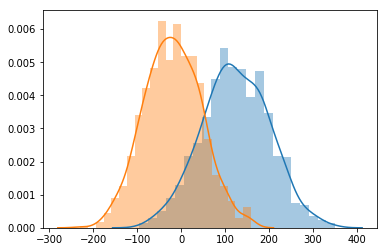

In [58]:
import numpy as np
import seaborn as sns

p1 = u"Jens Finnäs"
p2 = u"Sofia Rådström"

mu1 = df.loc[p1]["mu"]
mu2 = df.loc[p2]["mu"]
sigma1 = df.loc[p1]["sigma"]
sigma2 = df.loc[p2]["sigma"]
s1 = np.random.normal(mu1,sigma1, 1000)
s2 = np.random.normal(mu2,sigma2, 1000)
sns.distplot(s1)
sns.distplot(s2)


In [59]:
env = TrueSkill(draw_probability=0)
BETA = env.beta
import math
p1, p2 = p2, p1
print p1, p2


def win_probability(a, b):                                                      
    deltaMu = sum([x.mu for x in a]) - sum([x.mu for x in b])                   
    sumSigma = sum([x.sigma ** 2 for x in a]) + sum([x.sigma ** 2 for x in b])  
    playerCount = len(a) + len(b)                                               
    denominator = math.sqrt(playerCount * (BETA * BETA) + sumSigma)             
    return env.cdf(deltaMu / denominator) 

rank1 = player_skills[p1][-1]
rank2 = player_skills[p2][-1]
print rank1.mu, rank2.mu
win_probability([rank1], [rank2])

Sofia Rådström Jens Finnäs
-20.8215061887 126.662730649


0.07882636362118285

In [57]:
def predict_winner(row):
    p1 = row["Spelare 1"]
    p2 = row["Spelare 2"]
    try:
        p1_skill = player_skills[p1][-1]
    except (KeyError, IndexError):
        p1_skill = Rating()
    
    try:
        p2_skill = player_skills[p2][-1]
    except (KeyError, IndexError):
        p2_skill = Rating()
    
    row["p1_skill"] = p1_skill.mu
    row["p2_skill"] = p2_skill.mu
    row["win_prob1"] = win_probability([p1_skill], [p2_skill])
    row["win_prob2"] = 1 - row["win_prob1"]
    if row["win_prob1"] == row["win_prob2"]:
        row["predicted_winner"] = None
    elif row["win_prob1"] > row["win_prob2"]:
        row["predicted_winner"] = p1
    else:
        row["predicted_winner"] = p2
        
    return row

df_games_test = df_games_test.apply(predict_winner, axis=1)
df_games_test["certainty"] = df_games_test[["win_prob1", "win_prob2"]].max(axis=1)
df_games_test["correct_winner"] = df_games_test.Vinnare == df_games_test.predicted_winner
df_games_test[~df_games_test.correct_winner].sort_values("certainty")

,Turnering,Nivå,Spelare 1,Spelare 2,Poäng 1,Poäng 2,Vinnare,p1_score_share,p2_score_share,p1_skill,p2_skill,win_prob1,win_prob2,predicted_winner,certainty,correct_winner
304,2019,Gruppspel,Jan Bergstrand,Olle Nyrén,3,9,Olle Nyrén,25,75,100.000000,100.000000,0.500000,0.500000,Jan Bergstrand,0.500000,False
305,2019,Gruppspel,Frida Danielsson,Olaver,1,8,Olaver,11,89,100.000000,100.000000,0.500000,0.500000,Frida Danielsson,0.500000,False
353,2019,Kvartsfinal,Robeson,Pelle Dovborg,10,7,Robeson,59,41,70.393467,73.697823,0.488363,0.511637,Pelle Dovborg,0.511637,False
263,2019,Gruppspel,Louise Persson,Monica Harder,4,8,Monica Harder,33,67,106.098771,100.000000,0.518649,0.481351,Louise Persson,0.518649,False
352,2019,Kvartsfinal,Benjamin Ger. Hed.,Jens Hultkrans,10,6,Benjamin Ger. Hed.,63,38,150.344644,159.677944,0.463476,0.536524,Jens Hultkrans,0.536524,False
332,2019,sextondelsfinal,Love Andréasson,Benjamin Ger. Hed.,8,10,Benjamin Ger. Hed.,44,56,164.010835,150.344644,0.555010,0.444990,Love Andréasson,0.555010,False
257,2019,Gruppspel,Olle Strandberg,Viktor Gärde,7,8,Viktor Gärde,47,53,118.736330,100.000000,0.556312,0.443688,Olle Strandberg,0.556312,False
324,2019,Gruppspel,Christian Steen,Olle Strandberg,8,5,Christian Steen,62,38,100.000000,118.736330,0.443688,0.556312,Olle Strandberg,0.556312,False
330,2019,sextondelsfinal,Mina Kheirkhah,Christian Steen,12,8,Mina Kheirkhah,60,40,77.704493,100.000000,0.432987,0.567013,Christian Steen,0.567013,False
292,2019,Gruppspel,Christian Steen,Mina Kheirkhah,5,8,Mina Kheirkhah,38,62,100.000000,77.704493,0.567013,0.432987,Christian Steen,0.567013,False


In [56]:
df_games_test.groupby("correct_winner").count()

,Turnering,Nivå,Spelare 1,Spelare 2,Poäng 1,Poäng 2,Vinnare,p1_score_share,p2_score_share,p1_skill,p2_skill,win_prob1,win_prob2,predicted_winner,certainty
correct_winner,,,,,,,,,,,,,,,
False,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43
True,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69


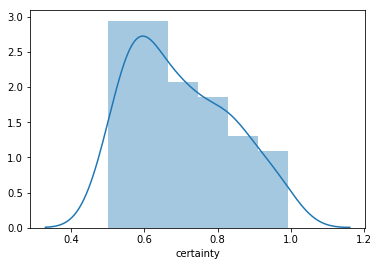

In [52]:
import seaborn as sns
sns.distplot(df_games_test.certainty)

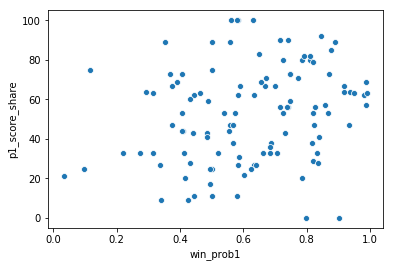

In [55]:
sns.scatterplot(y=df_games_test.p1_score_share, x=df_games_test.win_prob1)

In [27]:
df_games_test[u"Poängandel 1"]

248     64%
249     90%
250     80%
251     75%
252     53%
253     33%
254     73%
255     20%
256     80%
257     47%
258     22%
259     67%
260     73%
261     33%
262     20%
263     33%
264     89%
265     64%
266     90%
267     69%
268     62%
269     73%
270     57%
271    100%
272     38%
273     11%
274     80%
275     89%
276     57%
277     69%
       ... 
330     60%
331     59%
332     44%
333     21%
334     83%
335     44%
336     29%
337     56%
338     85%
339      0%
340      9%
341     92%
342     56%
343     63%
344     79%
345      9%
346     56%
347     33%
348     38%
349     63%
350     41%
351     47%
352     63%
353     59%
354     71%
355     67%
356     53%
357     28%
358     28%
359     41%
Name: Poängandel 1, Length: 112, dtype: object